In [35]:
# load libraries
library(data.table)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(gridExtra)

In [36]:
# set paths
results_dir = "/space/syn50/1/data/ABCD/d9smith/random_effects/results_2023-03-03/designMat02_t1w_AgeSexScanSoft/FASE/"
savepath = "/home/d9smith/projects/random_effects/plots/results_2023-03-03/FASE/"

In [37]:
# load data
filenames = list.files(path = results_dir, pattern = "*.csv")

for (fname in filenames) {
    pheno = str_split(fname, "_")[[1]][1]
    rand = str_split(str_split(fname, "_")[[1]][5],".csv")[[1]][1]
    vname = paste(pheno, rand, sep='_')
    
    df = read.table(paste(results_dir, fname, sep=""), sep=',', header=TRUE)
    df$rand = rand
    df$rand = ifelse(df$rand=="F", "C", df$rand) # change F to C for ease of interpretation
    df$rand = factor(df$rand, levels = c("A", "C", "S", "E"))
    
    # add variable for longer name of random effect
    df$rand_long = recode(df$rand, 
                          "A" = "Additive Genetic (A)", 
                          "C" = "Common Env. (C)", 
                          "S" = "Subject (S)", 
                          "E" = "Unexplained (E)")

    # fix labels of regions
    df$Label = strsplit(as.character(df$Label),"-")
    
    for (i in 1:length(df$Label)) {
        df$Label_combined[i] = df$Label[i][[1]][2]
        df$Label[i] = paste(rev(df$Label[i][[1]]),collapse=" ")
    }
    
    df$Label = unlist(df$Label)
    
    # save as dataframe
    assign(vname, df) 
}

In [38]:
# combine into one dataframe per phenotype
area = rbind(area_A, area_F, area_S, area_E)
thickness = rbind(thickness_A, thickness_F, thickness_S, thickness_E)
sulc = rbind(sulc_A, sulc_F, sulc_S, sulc_E)

In [39]:
names(area)

[1] "Stats"          "Label"          "rand"           "rand_long"     
[5] "Label_combined"

In [40]:
# Function to create plots
plot_roi <- function(df, label='Label') {

    ggplot(na.omit(df), aes(x=na.omit(df)[,label], y=Stats)) + 
    geom_violin(width=2, size=0.1) + 
    stat_summary(fun = "mean", geom="point", shape=1, size=0.2)+
    coord_flip() +
    xlab("") +
    ylab("Proportion of Variance")+
    facet_wrap( ~ rand_long, nrow = 1)+
    theme_bw()+
    theme(axis.text.y = element_text(size=6))
}

In [41]:
plot_area = plot_roi(area)

In [42]:
plot_thickness = plot_roi(thickness)

In [43]:
plot_sulc = plot_roi(sulc)

Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”


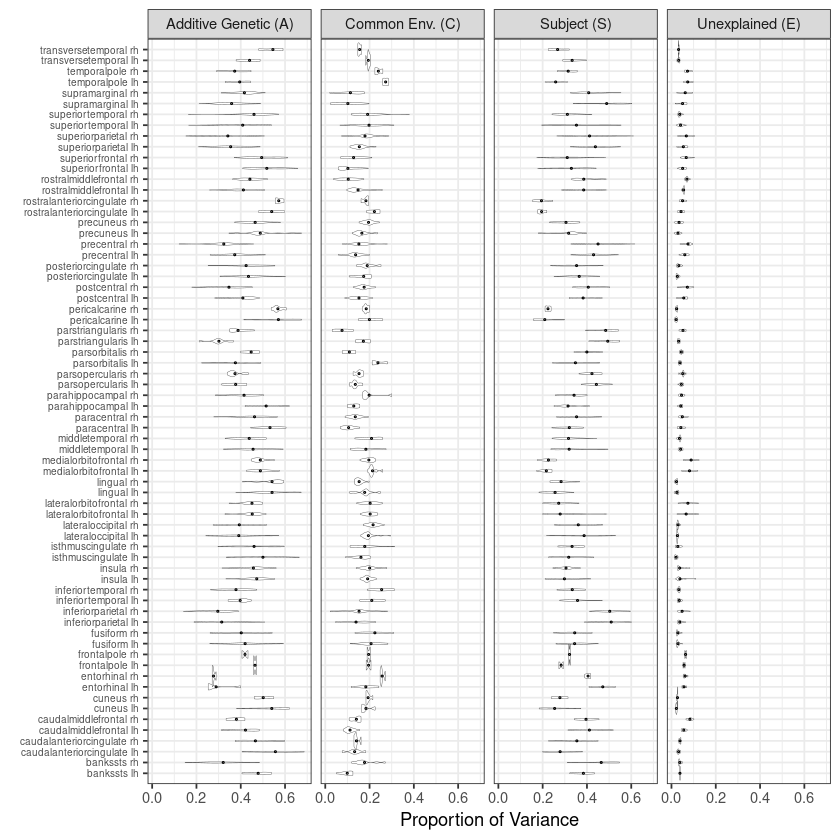

Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”


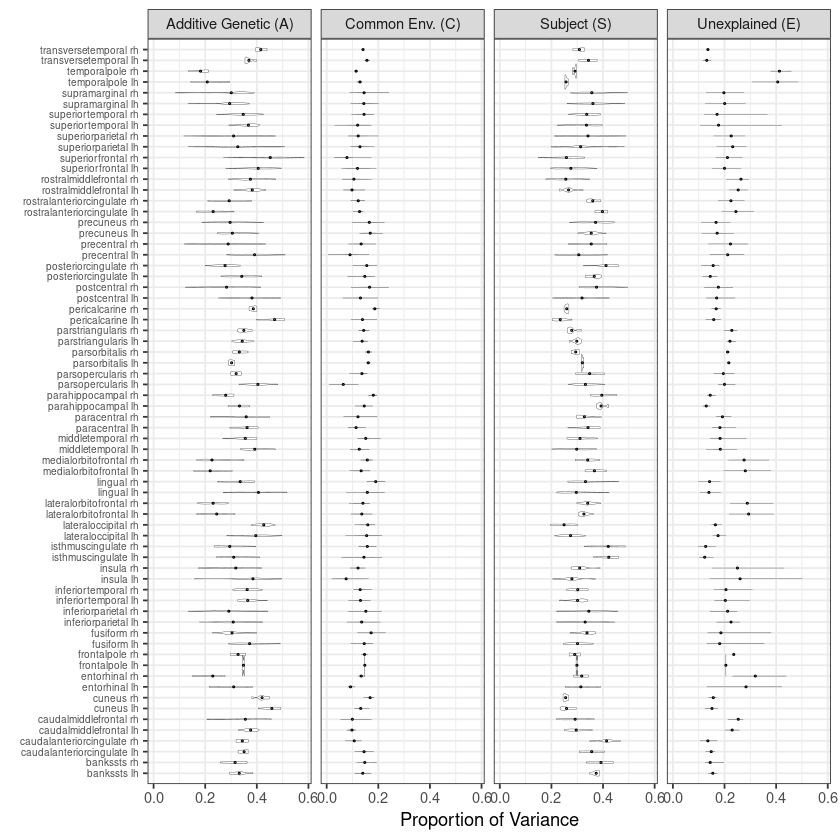

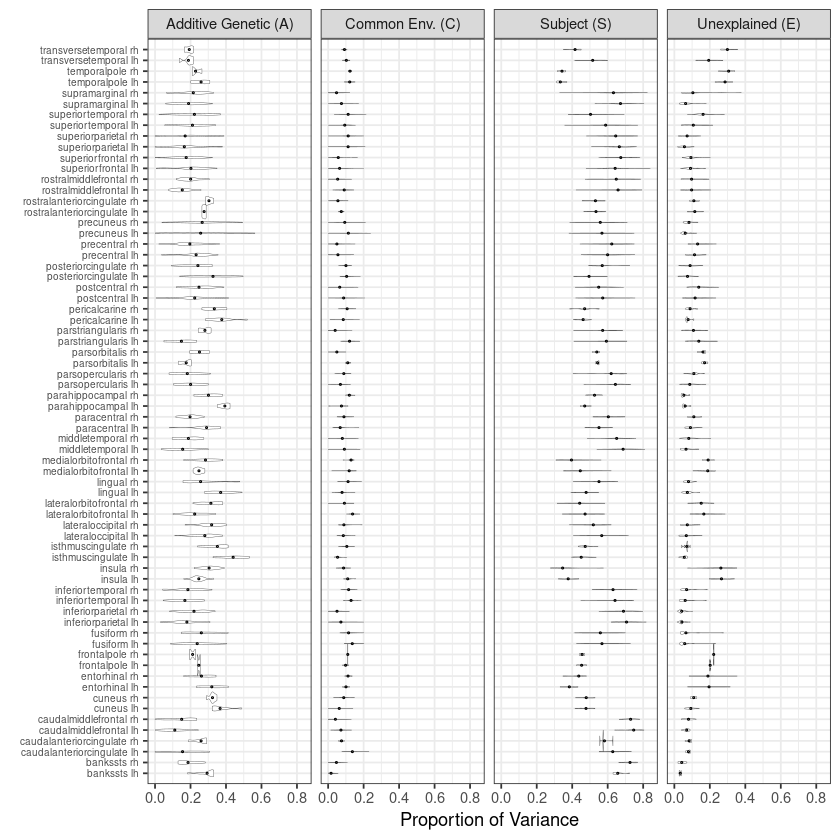

In [44]:
plot_area
plot_thickness
plot_sulc

In [45]:
# Function to view means by region - note this is hard-coded to sort by "Label_combined"
summary_roi <- function(df, rand) {
    df[df$rand==rand,] %>%
    group_by(Label_combined) %>%
    summarise(mean = mean(Stats)) %>%
    arrange(mean)
}

In [46]:
summary_roi(sulc, 'S'); 

# summary_roi(thickness); summary_roi(area); summary_roi(sulc)
# cbind(summary_roi(thickness), summary_roi(area), summary_roi(sulc))

Label_combined,mean
<chr>,<dbl>
NA,0.0000000
temporalpole,0.3370236
insula,0.3612109
entorhinal,0.4074366
medialorbitofrontal,0.4206561
frontalpole,0.4543468
lateralorbitofrontal,0.4564349
isthmuscingulate,0.4613542
pericalcarine,0.4654406


In [47]:
# specify dimensions of plots to save
height = 9
width = 7

In [48]:
ggsave(plot_area, file = paste(savepath,'area_ROI_sephemisphere.eps',sep=""), height = height, width = width)
ggsave(plot_thickness, file = paste(savepath,'thickness_ROI_sephemisphere.eps',sep=""), height = height, width = width)
ggsave(plot_sulc, file = paste(savepath,'sulc_ROI_sephemisphere.eps',sep=""), height = height, width = width)

Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
